<h1>The Adult Income dataset</h1>

<h2>Description</h2>


<h3>Title of dataset: adult.csv</h3>

<b>Sources</b>:

* Original owners of database - US Census Bureau
* Donor of database - Ronny Kohavi and Barry Becker
* Date received - 05/19/96 

<b>Number of Instances</b>:

* 48842 instances, mix of continuous and discrete (train=32561, test=16281)
* 45222 if instances with unknown values are removed (train=30162, test=15060)
* Split into train-test using MLC++ GenCVFiles (2/3, 1/3 random).

<b>Number of Attributes/Fearures/Columns</b>:

* 6 continuous, 8 nominal attributes. 

<b>Attribute Information/Fearures/Columns</b>

* age: continuous.
* workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* fnlwgt: continuous.
* education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* education-num: continuous.
* marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* sex: Female, Male.
* capital-gain: continuous.
* capital-loss: continuous.
* hours-per-week: continuous.
* native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
* income: >50K, <=50K 

<b>Missing Values</b>:

 * 7% rows have missing values. 

In [192]:
# imporing all libraries which are required 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [193]:
# reading the dataset
missing=['?']
df=pd.read_csv('adult.csv',na_values=missing)

In [194]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [195]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [196]:
df['income'].astype('category').value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

In [197]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       46033 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   47985 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [198]:
df[df.isnull().sum(axis=1) >=3]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
2160,28,NaN,243190,Bachelors,13,Never-married,NaN,Not-in-family,Asian-Pac-Islander,Male,0,0,30,NaN,<=50K
2323,50,NaN,339547,Some-college,10,Married-civ-spouse,NaN,Husband,Asian-Pac-Islander,Male,0,0,50,NaN,<=50K
2584,47,NaN,163748,Masters,14,Divorced,NaN,Unmarried,White,Female,0,0,35,NaN,<=50K
2612,27,NaN,258231,HS-grad,9,Never-married,NaN,Not-in-family,White,Male,0,0,35,NaN,<=50K
2774,27,NaN,132372,HS-grad,9,Never-married,NaN,Unmarried,White,Female,0,0,40,NaN,<=50K
3074,23,NaN,264874,Assoc-voc,11,Never-married,NaN,Other-relative,White,Female,0,0,40,NaN,<=50K
3671,24,NaN,35633,Some-college,10,Never-married,NaN,Not-in-family,White,Male,0,0,11,NaN,<=50K
3853,28,NaN,195568,Some-college,10,Married-civ-spouse,NaN,Wife,White,Female,0,0,15,NaN,>50K
5052,21,NaN,156780,Some-college,10,Never-married,NaN,Not-in-family,Asian-Pac-Islander,Female,0,0,15,NaN,<=50K
5972,40,NaN,95049,Assoc-voc,11,Separated,NaN,Own-child,White,Female,0,0,40,NaN,<=50K


In [199]:
df=df.dropna(how='any')
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45222 non-null  int64 
 1   workclass        45222 non-null  object
 2   fnlwgt           45222 non-null  int64 
 3   education        45222 non-null  object
 4   educational-num  45222 non-null  int64 
 5   marital-status   45222 non-null  object
 6   occupation       45222 non-null  object
 7   relationship     45222 non-null  object
 8   race             45222 non-null  object
 9   gender           45222 non-null  object
 10  capital-gain     45222 non-null  int64 
 11  capital-loss     45222 non-null  int64 
 12  hours-per-week   45222 non-null  int64 
 13  native-country   45222 non-null  object
 14  income           45222 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.5+ MB


## Data Prepration


In [201]:
df.drop('fnlwgt', axis=1, inplace=True)
df.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [202]:
df.drop('educational-num', axis=1, inplace=True)
df.head()

,age,workclass,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,10th,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [203]:
df.drop('native-country', axis=1, inplace=True)
df.head()

,age,workclass,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,income
0,25,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,<=50K
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,<=50K
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,>50K
3,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,>50K
5,34,Private,10th,Never-married,Other-service,Not-in-family,White,Male,0,0,30,<=50K


In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45222 non-null  int64 
 1   workclass       45222 non-null  object
 2   education       45222 non-null  object
 3   marital-status  45222 non-null  object
 4   occupation      45222 non-null  object
 5   relationship    45222 non-null  object
 6   race            45222 non-null  object
 7   gender          45222 non-null  object
 8   capital-gain    45222 non-null  int64 
 9   capital-loss    45222 non-null  int64 
 10  hours-per-week  45222 non-null  int64 
 11  income          45222 non-null  object
dtypes: int64(4), object(8)
memory usage: 4.5+ MB


In [205]:
cat= df.select_dtypes(include=['object'])
cat.head()

,workclass,education,marital-status,occupation,relationship,race,gender,income
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,<=50K
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,<=50K
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,>50K
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,>50K
5,Private,10th,Never-married,Other-service,Not-in-family,White,Male,<=50K


In [206]:
num = df.select_dtypes(include=['int64' ,  'float64'])
num.head()

,age,capital-gain,capital-loss,hours-per-week
0,25,0,0,40
1,38,0,0,50
2,28,0,0,40
3,44,7688,0,40
5,34,0,0,30


In [207]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df_num = pd.DataFrame(ss.fit_transform(num), 
                      columns = num.columns)
df_num.head()

,age,capital-gain,capital-loss,hours-per-week
0,-1.024983,-0.146733,-0.21878,-0.078120
1,-0.041455,-0.146733,-0.21878,0.754701
2,-0.798015,-0.146733,-0.21878,-0.078120
3,0.412481,0.877467,-0.21878,-0.078120
4,-0.344079,-0.146733,-0.21878,-0.910942


In [208]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse=False)
df_cat = pd.DataFrame(encoder.fit_transform(cat), 
                      columns=encoder.get_feature_names(cat.columns))
df_cat.head()

,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_11th,education_12th,education_1st-4th,education_5th-6th,...,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,gender_Male,income_>50K
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [473]:
df = pd.concat([df_num, df_cat], axis=1)
df.head()

,age,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,...,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,gender_Male,income_>50K
0,-1.024983,-0.146733,-0.21878,-0.078120,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,-0.041455,-0.146733,-0.21878,0.754701,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,-0.798015,-0.146733,-0.21878,-0.078120,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
3,0.412481,0.877467,-0.21878,-0.078120,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
4,-0.344079,-0.146733,-0.21878,-0.910942,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [210]:
y = df.pop('income_>50K')
x = df

In [374]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=100)

In [375]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(31655, 54) (31655,)
(13567, 54) (13567,)


In [376]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [377]:
print(logisticRegr.coef_)
print(logisticRegr.intercept_)

[[ 0.31347446  2.42569719  0.27350225  0.35583214 -0.55386558 -0.39052424
  -0.23654921 -0.8921434  -0.67878514 -0.70400513 -0.09095679  0.34439319
  -0.69380815 -0.4861088  -0.58464979 -0.38058636  1.2288807   1.14680181
   1.81087093  2.69277842  0.69180164  2.06838583 -1.14675464  2.58283086
   1.04639025  2.04502687  1.97128526 -0.04464931 -0.45244019 -0.09446093
   0.09579202  0.17183979  0.03544591  0.76063903 -0.95137516 -0.66462285
  -0.33956484 -0.89852947 -1.48112912  0.51838321  0.48004218  0.27742163
   0.57426711 -0.03558464  0.19328148 -0.69330573 -0.96027911 -0.03291939
   1.04399768  0.50124492  0.30479894  0.06300377  0.57155152  0.6317115 ]]
[-4.22786344]


In [378]:
y_train_pred = logisticRegr.predict(x_train)

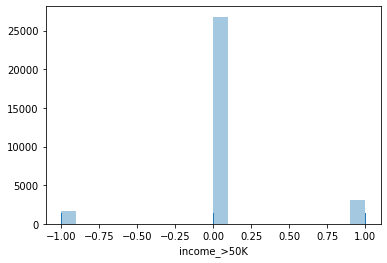

In [379]:
residual = y_train - y_train_pred

sns.distplot(residual, bins=20, kde=False, rug=True)

In [380]:
y_test_pred = logisticRegr.predict(x_test)

In [381]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
40273,0.0,0.0
1984,1.0,0.0
1230,1.0,0.0
25507,0.0,0.0
553,0.0,1.0


In [382]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  0.1511019385273089
Mean Squared Error:  0.1511019385273089
Root Mean Squared Error:  0.3887183280053938


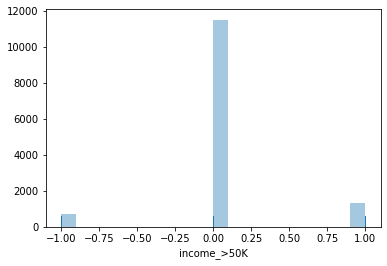

In [383]:
residual_test = y_test - y_test_pred

sns.distplot(residual_test, bins=20, kde=False, rug=True)

In [384]:
print(metrics.r2_score(y_test, y_test_pred))
print(metrics.accuracy_score(y_test,y_test_pred))

0.18838987238166216
0.8488980614726911


In [385]:
c_matrix = metrics.confusion_matrix(y_test,y_test_pred)
c_matrix

array([[9497,  714],
       [1336, 2020]], dtype=int64)

In [386]:
print(metrics.classification_report(y_test, y_test_pred))
# Number of features = 55

              precision    recall  f1-score   support

         0.0       0.88      0.93      0.90     10211
         1.0       0.74      0.60      0.66      3356

    accuracy                           0.85     13567
   macro avg       0.81      0.77      0.78     13567
weighted avg       0.84      0.85      0.84     13567



# RFE

In [387]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
lgr= LogisticRegression()

In [477]:
rfe = RFE(lgr, 26)
rfe = rfe.fit(x_train, y_train)

In [478]:
temp_df = pd.DataFrame({"Columns" : x_train.columns, "Included" : rfe.support_, "Ranking" : rfe.ranking_})
temp_df


,Columns,Included,Ranking
0,age,False,8
1,capital-gain,True,1
2,capital-loss,False,12
3,hours-per-week,False,6
4,workclass_Local-gov,False,13
5,workclass_Private,False,14
6,workclass_Self-emp-inc,False,19
7,workclass_Self-emp-not-inc,False,3
8,workclass_State-gov,False,10
9,workclass_Without-pay,False,7


In [479]:
imp_col = x_train.columns[rfe.support_]
imp_col

Index(['capital-gain', 'education_1st-4th', 'education_5th-6th',
       'education_7th-8th', 'education_Assoc-acdm', 'education_Assoc-voc',
       'education_Bachelors', 'education_Doctorate', 'education_HS-grad',
       'education_Masters', 'education_Preschool', 'education_Prof-school',
       'education_Some-college', 'marital-status_Married-AF-spouse',
       'marital-status_Married-civ-spouse', 'marital-status_Never-married',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct',
       'occupation_Other-service', 'occupation_Priv-house-serv',
       'relationship_Other-relative', 'relationship_Own-child',
       'relationship_Wife', 'gender_Male'],
      dtype='object')

In [480]:
x_train_new = df[imp_col]
x_train_new.head()

,capital-gain,education_1st-4th,education_5th-6th,education_7th-8th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,...,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,relationship_Other-relative,relationship_Own-child,relationship_Wife,gender_Male
0,-0.146733,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,-0.146733,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.146733,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.877467,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.146733,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [489]:
from sklearn.linear_model import LogisticRegression
regressor_new = LogisticRegression()
regressor_new.fit(x_train_new, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

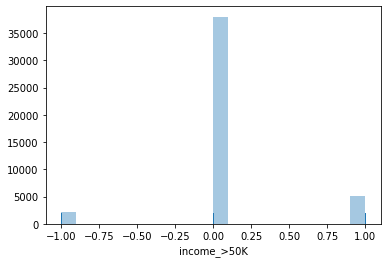

In [491]:
y_train_pred_new = regressor_new.predict(x_train_new)
residual = y - y_train_pred_new
sns.distplot(residual, bins=20, kde=False, rug=True)

In [492]:
x_test_new = df[imp_col]
y_test_pred_new = regressor_new.predict(x_test_new)

In [494]:
temp_df_new = pd.DataFrame({'Actual' : y, 'Predicted' : y_test_pred_new})
temp_df_new

,Actual,Predicted
0,0.0,0.0
1,0.0,0.0
2,1.0,0.0
3,1.0,1.0
4,0.0,0.0
...,...,...
45217,0.0,0.0
45218,1.0,0.0
45219,0.0,0.0
45220,0.0,0.0


In [497]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y, y_test_pred_new))

print('Mean Squared Error: ', metrics.mean_squared_error(y, y_test_pred_new))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y, y_test_pred_new)))

Mean Absolute Error:  0.16047499004909116
Mean Squared Error:  0.16047499004909116
Root Mean Squared Error:  0.40059329755887224


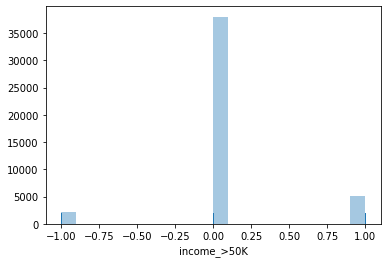

In [500]:
residual_test_new = y - y_test_pred_new

sns.distplot(residual_test_new, bins=20, kde=False, rug=True)

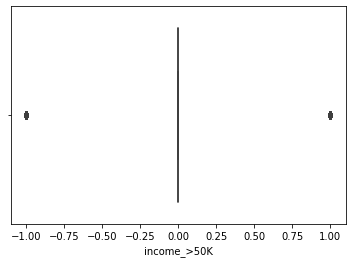

In [501]:
sns.boxplot(residual_test_new)

In [503]:
res_df = pd.DataFrame({'res_test' : residual_test, 'res_test_new': residual_test_new})
res_df.head()

,res_test,res_test_new
0,0.0,0.0
1,0.0,0.0
2,1.0,1.0
3,0.0,0.0
4,0.0,0.0


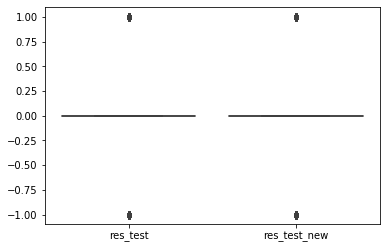

In [504]:
sns.boxplot(data = res_df)

In [499]:
print(metrics.r2_score(y, y_test_pred_new))
print(metrics.accuracy_score(y,y_test_pred_new))

0.1391627348557447
0.8395250099509088


In [505]:
print(metrics.classification_report(y, y_test_pred_new))

              precision    recall  f1-score   support

         0.0       0.86      0.93      0.90     34014
         1.0       0.74      0.55      0.63     11208

    accuracy                           0.84     45222
   macro avg       0.80      0.74      0.76     45222
weighted avg       0.83      0.84      0.83     45222



## PCA


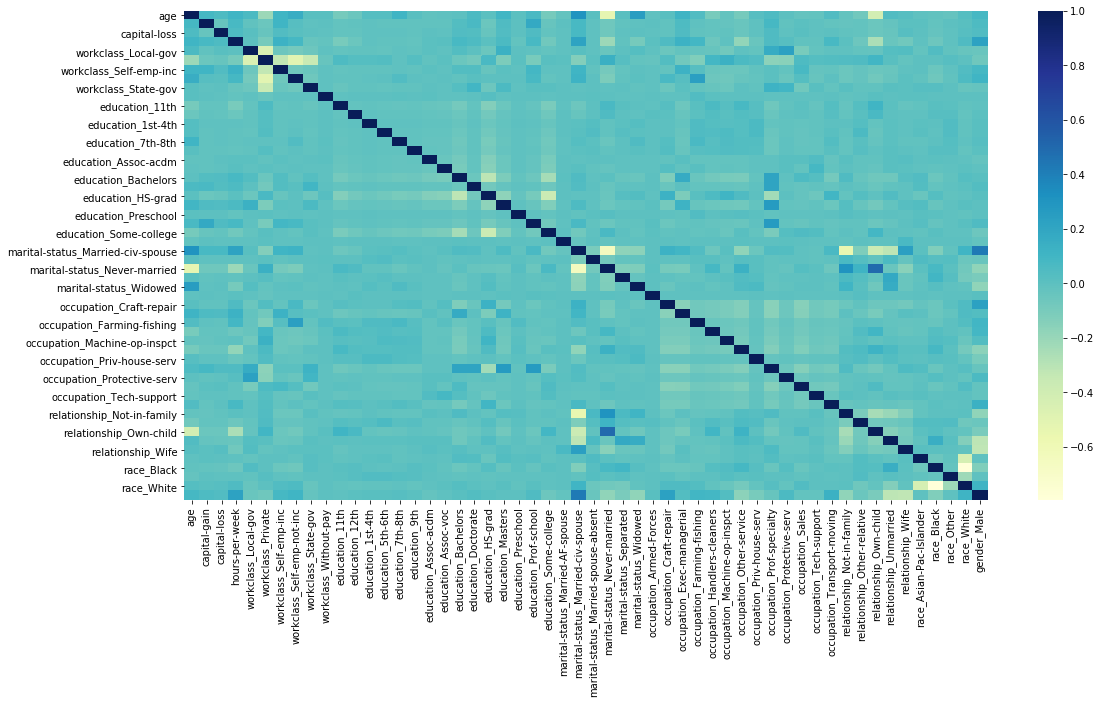

In [223]:
plt.figure(figsize=(18, 9))
sns.heatmap(x_train.corr(), cmap="YlGnBu")

In [224]:
x_train.shape

(31655, 54)

In [225]:
from sklearn.decomposition import PCA
pca = PCA(random_state = 0)

In [226]:
pca.fit(x_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=0,
    svd_solver='auto', tol=0.0, whiten=False)

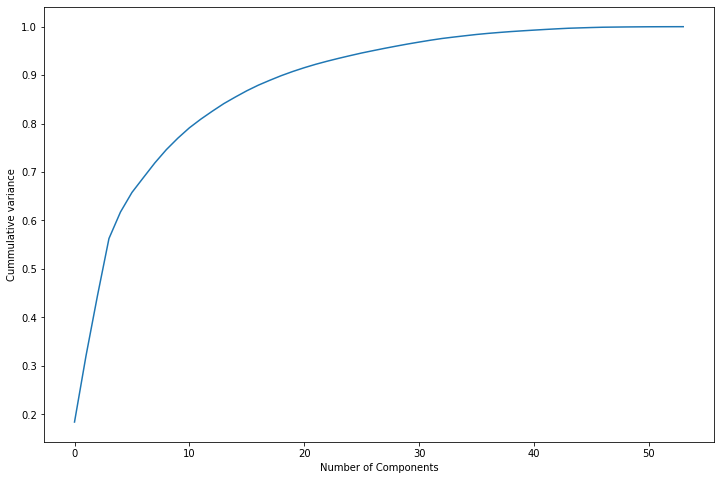

In [227]:
plt.figure(figsize = (12, 8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cummulative variance')
plt.show()

In [228]:
np.cumsum(pca.explained_variance_ratio_)

array([0.18399173, 0.32054252, 0.44492309, 0.5627725 , 0.61737037,
       0.65782049, 0.68857557, 0.71901907, 0.74632839, 0.76996183,
       0.79122555, 0.80920508, 0.82559595, 0.84122021, 0.85476289,
       0.8677054 , 0.87924681, 0.8893384 , 0.89893009, 0.90751004,
       0.91530542, 0.92240171, 0.92875508, 0.93468914, 0.94028029,
       0.94568594, 0.9505602 , 0.95532517, 0.95984509, 0.96420193,
       0.96822701, 0.97211578, 0.97564364, 0.97854164, 0.98127295,
       0.98393689, 0.98617295, 0.98811314, 0.98991271, 0.99145982,
       0.99291179, 0.99430236, 0.9955926 , 0.99677104, 0.99752842,
       0.99826041, 0.99887844, 0.9991801 , 0.99944745, 0.99965262,
       0.99981982, 0.99989934, 0.99996206, 1.        ])

In [229]:
from sklearn.decomposition import PCA

pca_final = PCA(n_components = 27, random_state = 0)

x_train_pca = pca_final.fit_transform(x_train)

In [230]:
x_train_pca.shape

(31655, 27)

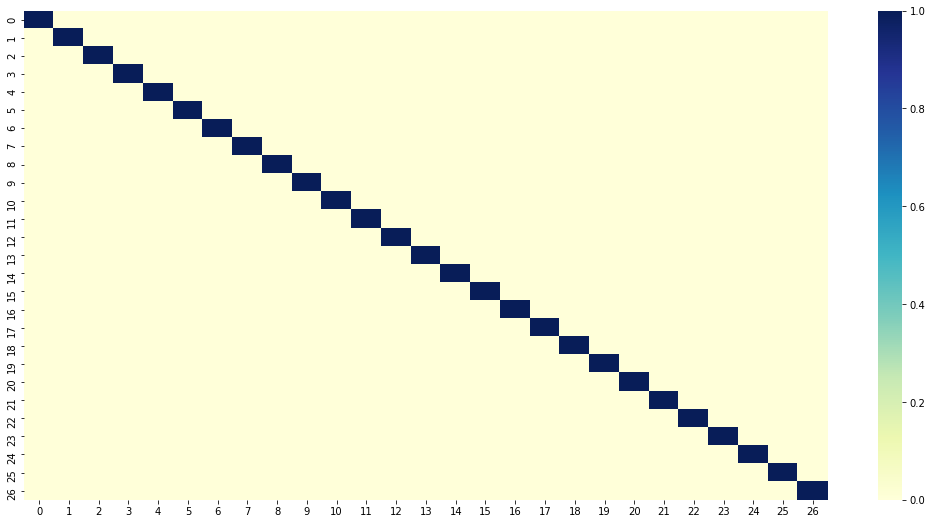

In [231]:
corrmat = np.corrcoef(x_train_pca.T)

plt.figure(figsize=(18, 9))

sns.heatmap(corrmat, cmap="YlGnBu")

In [232]:
x_test_pca = pca_final.transform(x_test)

In [329]:
from sklearn.linear_model import LogisticRegression

regressor_pca = LogisticRegression()

regressor_pca.fit(x_train_pca, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [330]:
print(regressor_pca.coef_)

print(regressor_pca.intercept_)

[[ 2.0723526  -1.074082    0.55010411  1.70955097 -1.15799684 -0.92877542
  -0.07301933 -0.36429762 -1.28965936 -0.15780882 -1.14310275  0.37580876
   0.34684493 -0.39558249  0.22516805 -1.30116834 -0.03176434 -0.65102104
  -0.79545274 -0.72817773 -0.14734404  0.1836126   0.39599386  0.43333068
   0.39058748 -0.35640556 -0.04775828]]
[-1.87523129]


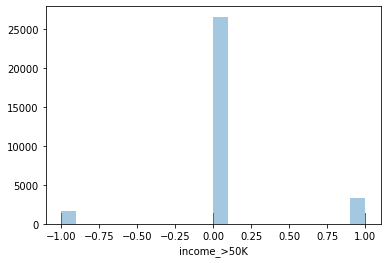

In [337]:
y_train_pred_pca = regressor_pca.predict(x_train_pca)

residual_pca = y_train - y_train_pred_pca

sns.distplot(residual_pca, bins=20, kde=False, rug=True)

In [338]:
y_test_pred_pca = regressor_pca.predict(x_test_pca)

temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred_pca})

temp_df.head()

,Actual,Predicted
40273,0.0,0.0
1984,1.0,0.0
1230,1.0,1.0
25507,0.0,0.0
553,0.0,1.0


In [339]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred_pca))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred_pca))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_pca)))

Mean Absolute Error:  0.15817793174614875
Mean Squared Error:  0.15817793174614875
Root Mean Squared Error:  0.39771589325314716


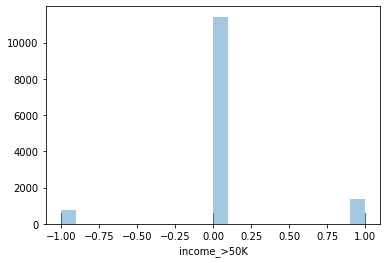

In [340]:
residual_test_pca = y_test - y_test_pred_pca

sns.distplot(residual_test_pca, bins=20, kde=False, rug=True)

In [495]:
print(metrics.r2_score(y_test, y_test_pred_pca))
print(metrics.accuracy_score(y_test,y_test_pred_pca))

0.1503827639663644
0.8418220682538513


In [506]:
print(metrics.classification_report(y_test, y_test_pred_pca))
# Number of features = 27

              precision    recall  f1-score   support

         0.0       0.87      0.92      0.90     10211
         1.0       0.72      0.59      0.65      3356

    accuracy                           0.84     13567
   macro avg       0.80      0.76      0.77     13567
weighted avg       0.83      0.84      0.84     13567

